In [54]:
# Look for Path Destination to save Data to
pwd

NameError: name 'pwd' is not defined

In [55]:
# Look across each line in the saved document and count the number of lines(messages)
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
print (len(messages))

5574


In [56]:
# Print out the first 15 messages
for num, message in enumerate(messages[:15]):
    print(message)
    print('\n')

ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


ham	Ok lar... Joking wif u oni...


spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


ham	U dun say so early hor... U c already then say...


ham	Nah I don't think he goes to usf, he lives around here though


spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


ham	Even my brother is not like to speak with me. They treat me like aids patent.


ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 

In [57]:
# Import pandas to create a database out of the data
import pandas as pd
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label','message'])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [58]:
# Use describe and info to get a better understanding of the data
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [59]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [60]:
# Group by the labels to further understand the data
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [61]:
# Create new column with the length of the message
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [62]:
# Import plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

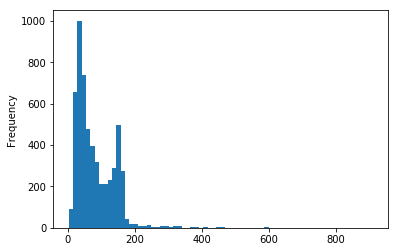

In [63]:
# Plot the length column to see the different lengths
messages['length'].plot(bins=70, kind='hist')

In [64]:
# Search for the large outlier we can see in the graph
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [65]:
# Find the message text for the max length message
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000202D968A6A0>,
      dtype=object)

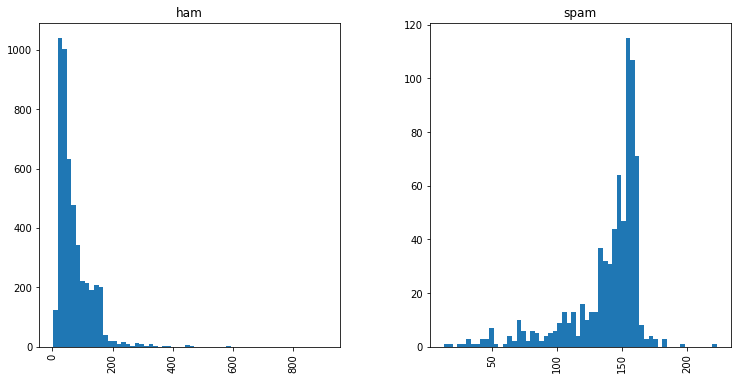

In [66]:
# Plot a graph to show the difference in lengths between ham and spam
messages.hist(column='length', by='label', bins=60, figsize=(12,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000202D98CEBE0>,
      dtype=object)

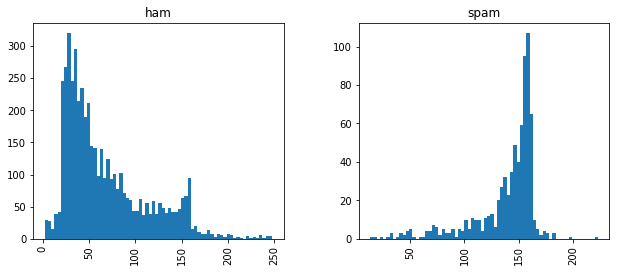

In [67]:
short_messages = messages
short_messages['length'] = short_messages['length'].loc[short_messages['length']<250]
short_messages.hist(column='length', by='label', bins=70,figsize=(10,4))

In [68]:
# Import string and stopwords to remove punctuation and stopwords from messages
import string
from nltk.corpus import stopwords

mess = 'This message, right here, contains punctuation and stopwords! Unless we remove them.'
nopunc = [char for char in mess if char not in string.punctuation]
nopunc = ''.join(nopunc)

clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_mess

['message',
 'right',
 'contains',
 'punctuation',
 'stopwords',
 'Unless',
 'remove']

In [69]:
# Create a function to do the above
def clean_text(mess):
    '''
    Takes in a string of text and does the following:
    1. Removes punctuation
    2. Removes all stopwords
    3. Returns a list of the cleaned up text
    
    '''
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)

    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [70]:
# Test function on same input
clean_text(mess)

['message',
 'right',
 'contains',
 'punctuation',
 'stopwords',
 'Unless',
 'remove']

In [71]:
# Example of how we can use this function on our dataset
messages['message'].head(10).apply(clean_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
5    [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6    [Even, brother, like, speak, treat, like, aids...
7    [per, request, Melle, Melle, Oru, Minnaminungi...
8    [WINNER, valued, network, customer, selected, ...
9    [mobile, 11, months, U, R, entitled, Update, l...
Name: message, dtype: object

In [72]:
# Import Count Vectorizer to convert text to token counts
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=clean_text)
bow_transformer.fit(messages['message'])

CountVectorizer(analyzer=<function clean_text at 0x00000202D998F378>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [73]:
message12 = messages['message'][13]
print(message12)

I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.


In [74]:
bow12 = bow_transformer.transform([message12])
print(bow12)

  (0, 2394)	1
  (0, 5075)	1
  (0, 5166)	1
  (0, 6751)	1
  (0, 6929)	1
  (0, 7089)	1
  (0, 9092)	2
  (0, 9422)	1
  (0, 9597)	1
  (0, 10295)	1
  (0, 10392)	1
  (0, 10491)	1
  (0, 11142)	1
  (0, 11145)	1
  (0, 11154)	1


In [75]:
print(bow_transformer.get_feature_names()[10295])

take


In [76]:
messages_bow = bow_transformer.transform(messages['message'])

In [77]:
print ('Shape of Sparse Matrix: {}'.format(messages_bow.shape))
print ('Amount of Non-Zero occurences: {}'.format(messages_bow.nnz))
print ('sparsity: {:.2f}'.format(100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))

Shape of Sparse Matrix: (5572, 11425)
Amount of Non-Zero occurences: 50548
sparsity: 0.08


In [79]:
# importing tf-idf transformer, for weighting the impact of words more effectively. Use transformer on bow12
from sklearn.feature_extraction.text import TfidfTransformer
tf_idf_transformer = TfidfTransformer().fit(messages_bow)
tfidf12 = tf_idf_transformer.transform(bow12)
print(bow12)

  (0, 2394)	1
  (0, 5075)	1
  (0, 5166)	1
  (0, 6751)	1
  (0, 6929)	1
  (0, 7089)	1
  (0, 9092)	2
  (0, 9422)	1
  (0, 9597)	1
  (0, 10295)	1
  (0, 10392)	1
  (0, 10491)	1
  (0, 11142)	1
  (0, 11145)	1
  (0, 11154)	1


In [80]:
# Transform all of the messages (messages_bow), check the shape
messages_tfidf = tf_idf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


In [81]:
# Import the MultinomialNB for classification, and use a classification report for results
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [83]:
print('The prediction for the model is: {}'.format(spam_detect_model.predict(tfidf12)[0]))
print('The actual value is: {}'.format(messages.label[13]))

The prediction for the model is: ham
The actual value is: ham


In [84]:
# import classification report to look at recall/precision/f1 score
from sklearn.metrics import classification_report
print(classification_report(spam_detect_model.predict(messages_tfidf), messages['label']))

             precision    recall  f1-score   support

        ham       1.00      0.98      0.99      4940
       spam       0.85      1.00      0.92       632

avg / total       0.98      0.98      0.98      5572



In [85]:
# Above data was using the same test and training data, import train test split to avoid this problem
from sklearn.model_selection import train_test_split
messages_train, messages_test, label_train, label_test = train_test_split(messages['message'],messages['label'],test_size=0.2)

In [87]:
# Build a pipeline to do each stage in one go (CountVectorizer, tf-idf and MultinomialNB)
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('Count Vectorizer', CountVectorizer(analyzer=clean_text)),
                     ('Tf-idf', TfidfTransformer()),
                     ('Classifier', MultinomialNB())
])

In [89]:
# Fit the training data to the pipeline, then predict based on this and do a classification report
pipeline.fit(messages_train, label_train)

Pipeline(memory=None,
     steps=[('Count Vectorizer', CountVectorizer(analyzer=<function clean_text at 0x00000202D998F378>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), ...f=False, use_idf=True)), ('Classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [90]:
predictions = pipeline.predict(messages_test)

In [91]:
print(classification_report(predictions, label_test))

             precision    recall  f1-score   support

        ham       1.00      0.96      0.98      1009
       spam       0.72      1.00      0.83       106

avg / total       0.97      0.96      0.97      1115

